(mswep)=
# Multi-Source Weighted-Ensemble Precipitation (MSWEP)

## Product description

The Multi-Source Weighted-Ensemble Precipitation (MSWEP) is a global 
precipitation dataset that merges precipitation estimates from a variety of 
sources into a single gridded product. The MSWEP dataset available in the SALDi 
Data Cube (SDC) has been acquired from [GloH2O](https://www.gloh2o.org/mswep/) 
with daily, 0.1° (~11 km) resolution.

The product abbreviation used in this package is `mswep`

## Import packages

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sdc.load import load_product

## Loading data

In [1]:
mswep = load_product(product="mswep",
                     vec="site06", 
                     time_range=("2018-01-01", "2022-01-01"))
mswep

<xarray.DataArray 'precipitation' (time: 1461, latitude: 11, longitude: 13)>
array([[[2.50000000e-01, 3.75000000e-01, 3.75000000e-01, ...,
         8.75000000e-01, 1.37500000e+00, 1.43750000e+00],
        [2.50000000e-01, 3.12500000e-01, 3.12500000e-01, ...,
         8.75000000e-01, 1.37500000e+00, 1.43750000e+00],
        [1.87500000e-01, 2.50000000e-01, 2.50000000e-01, ...,
         9.37500000e-01, 8.12500000e-01, 8.12500000e-01],
        ...,
        [5.00000000e-01, 6.87500000e-01, 7.50000000e-01, ...,
         1.37500000e+00, 8.12500000e-01, 8.12500000e-01],
        [5.00000000e-01, 7.50000000e-01, 7.50000000e-01, ...,
         1.43750000e+00, 9.37500000e-01, 8.75000000e-01],
        [1.25000000e-01, 1.06250000e+00, 1.12500000e+00, ...,
         1.81250000e+00, 2.25000000e+00, 2.18750000e+00]],

       [[2.31250000e+00, 3.37500000e+00, 3.06250000e+00, ...,
         4.62500000e+00, 7.25000000e+00, 6.68750000e+00],
        [3.56250000e+00, 3.18750000e+00, 3.06250000e+00, ...,
         4.18750000e+00, 5.93750000e+00, 5.62500000e+00],
        [4.25000000e+00, 1.03125000e+01, 5.87500000e+00, ...,
         3.62500000e+00, 4.75000000e+00, 4.93750000e+00],
...
        [2.69687500e+01, 2.96250000e+01, 3.26093750e+01, ...,
         1.48750000e+01, 1.19453125e+01, 1.27500000e+01],
        [2.98515625e+01, 3.71718750e+01, 3.89609375e+01, ...,
         1.73750000e+01, 1.40546875e+01, 1.43359375e+01],
        [3.26953125e+01, 3.25390625e+01, 3.83437500e+01, ...,
         1.71718750e+01, 1.79921875e+01, 1.90859375e+01]],

       [[4.53125000e-01, 5.07812500e-01, 5.07812500e-01, ...,
         5.46875000e-02, 3.12500000e-02, 3.12500000e-02],
        [4.68750000e-01, 5.00000000e-01, 4.68750000e-01, ...,
         4.68750000e-02, 3.12500000e-02, 3.12500000e-02],
        [1.31250000e+00, 5.07812500e-01, 4.68750000e-01, ...,
         4.68750000e-01, 3.90625000e-02, 3.90625000e-02],
        ...,
        [6.56250000e-01, 5.62500000e-01, 5.78125000e-01, ...,
         1.32812500e-01, 1.40625000e-01, 1.32812500e-01],
        [6.71875000e-01, 5.85937500e-01, 6.17187500e-01, ...,
         1.48437500e-01, 1.48437500e-01, 1.40625000e-01],
        [8.90625000e-01, 8.75000000e-01, 9.14062500e-01, ...,
         6.25000000e-02, 2.57812500e-01, 2.50000000e-01]]], dtype=float32)
Coordinates:
  * time         (time) datetime64[ns] 2018-01-01 2018-01-02 ... 2022-01-01
  * longitude    (longitude) float32 30.85 30.95 31.05 ... 31.85 31.95 32.05
  * latitude     (latitude) float32 -24.95 -25.05 -25.15 ... -25.85 -25.95
    spatial_ref  int32 4326
Attributes:
    units:    mm d-1

In comparison to other datasets, the MSWEP data is not loaded lazily, so you see 
the underlying numpy array when displaying the data. Notice the low spatial 
resolution (0.1° = ~11 km) of the data. The entire SALDi site 06 is covered by 
only 143 pixels:

In [2]:
mswep.shape[1] * mswep.shape[2]

143

As an example, let's plot the precipitation for a point using a 
[Matplotlib stem plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.stem.html#matplotlib.axes.Axes.stem):

In [3]:
mswep_pt = mswep.sel(longitude=31.5384, latitude=-25.0226, method="nearest")

Text(0, 0.5, 'Precipitation [mm/day]')

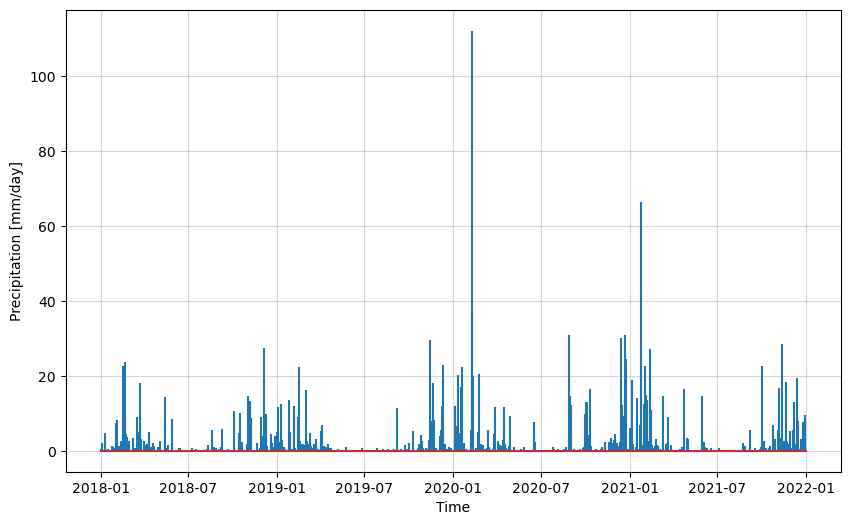

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.stem(mswep_pt.time, mswep_pt, markerfmt="")
ax.grid(True, alpha=0.5)
plt.xlabel("Time")
plt.ylabel("Precipitation [mm/day]")

```{tip}
Even Stackoverflow threads that are more than 9 years old can be helpful 
sometimes 🙂: 
https://stackoverflow.com/questions/26042735/python-matplotlib-stem-plot-with-no-markers
```